# Plot all channels for one site

This notebook demonstrates how to retrieve and plot all channels for one
site using jump_portrait.

In [1]:
import matplotlib.colors as mpl  # noqa: CPY001
import numpy as np
import polars as pl
from jump_portrait.fetch import get_item_location_info, get_jump_image
from matplotlib import pyplot as plt

First, we need to get location information telling us where all images
corresponding to a specific perturbation can be found. We will use the
“get_item_location” function from jump_portrait for this.

Here we retrieve image locations for the “RAB30” gene:

In [2]:
gene_info = get_item_location_info("RAB30")
gene_info.shape

(90, 28)

There are 90 images: 9 sites/well X 5 replicate wells X 2 data types
(CRISPR & ORF).

We can also retrieve locations for compound data. By default, the
function assumes a query by INCHI key. We can also query by JCP ID by
specifying the query column:

In [3]:
cmpd_info_byinchi = get_item_location_info("CLETVKMYAXARPO-UHFFFAOYSA-N")
cmpd_info_byjcp = get_item_location_info("JCP2022_011844", input_column="JCP2022")

print(cmpd_info_byinchi.shape)
print(cmpd_info_byjcp.shape)

(34, 28)
(34, 28)

There are 34 sites corresponding to this compound.

We’ve written a function to display all channels for a specific image.
Note that this is just one possible way to display images - we’ve
included the function here so that you can modify it to suit your own
needs.

In [4]:
def display_site(source: str, batch: str, plate: str, well: str, site: str, label: str, int_percentile: float) -> None:
    """Plot all channels from one image.

    Parameters
    ----------
    source : String
        Source ID for image of interest.
    batch : String
        Batch ID for image of interest.
    plate : String
        Plate ID for image of interest.
    well : String
        Well ID for image of interest.
    site : String
        Site ID for image of interest.
    label : String
        Label to display in lower left corner.
    int_percentile: float
        Rescale the image from 0 - this percentile of intensity values.

    """
    channels = ["DNA", "ER", "Mito", "AGP", "RNA"]

    n_rows = 2
    n_cols = 3

    # Make images
    axes = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))[1]
    axes = axes.ravel()
    counter = 0

    for channel in channels:
        if channel == "ER":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#65fe08"])
        elif channel == "DNA":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#0000FF"])
        elif channel == "Mito":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#FF0000"])
        elif channel == "AGP":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#FFFF00"])
        elif channel == "RNA":
            cmap = mpl.LinearSegmentedColormap.from_list("green_cmap", ["#000", "#FFA500"])
        else:
            cmap = "gray"

        img = get_jump_image(source, batch, plate, well, channel, site, None)

        ax = axes[counter]
        ax.imshow(img, vmin=0, vmax=np.percentile(img, int_percentile), cmap=cmap)
        ax.axis("off")

        # Add channel name label in the top left corner
        ax.text(
            0.05, 0.95, channel,
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=18,
            color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'),
            transform=ax.transAxes
        )
        
        counter += 1

    # put label in last subplot
    ax = axes[counter]
    ax.text(
        0.5,
        0.5,
        label,
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=20,
        color="black",
        transform=ax.transAxes,
    )
    ax.axis("off")

    # show plot
    plt.tight_layout()
    plt.show()

We can get the required location parameters from the location info that
we retrieved earlier. Here we get parameters for the first site in the
JCP compound results:

In [5]:
source, batch, plate, well, site, *rest = cmpd_info_byjcp.row(0)

Next, we define the label and make the plot:

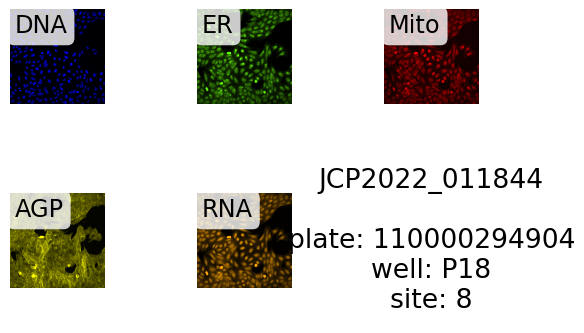

In [6]:
label = f"JCP2022_011844\n\nplate: {plate}\nwell: {well}\nsite: {site}"
display_site(source, batch, plate, well, site, label, 99.5)

Here, we plot one of the RAB30 ORF images:

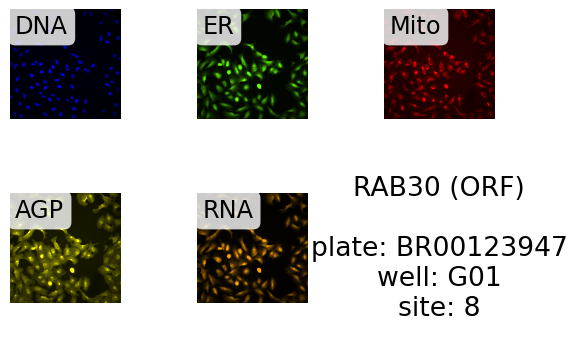

In [7]:
source, batch, plate, well, site, *rest = gene_info.filter(pl.col("Metadata_PlateType") == "ORF").row(0)
label = f"RAB30 (ORF)\n\nplate: {plate}\nwell: {well}\nsite: {site}"
display_site(source, batch, plate, well, site, label, 99.5)

And for CRISPR:

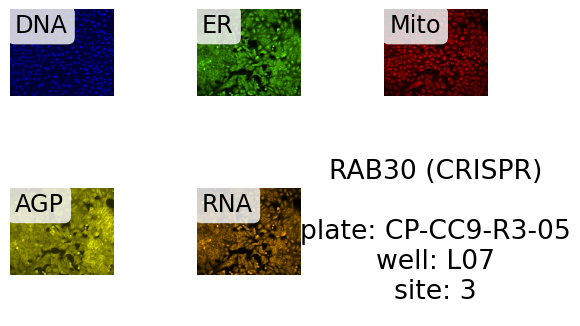

In [8]:
source, batch, plate, well, site, *rest = gene_info.filter(pl.col("Metadata_PlateType") == "CRISPR").row(0)
label = f"RAB30 (CRISPR)\n\nplate: {plate}\nwell: {well}\nsite: {site}"
display_site(source, batch, plate, well, site, label, 99.5)